# Final Project

In [ ]:
import os
import numpy as np
from numpy import arange
from numpy import absolute
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from collections import defaultdict
from IPython.display import Image
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from prettytable import PrettyTable
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection

In [ ]:
#os.chdir("/Users/jpzahn/Documents/FIFA Data")

In [ ]:
full_data = pd.read_csv("players_21.csv")

## Exploratory Data Analysis and Data Cleaning

### EDA

In [ ]:
for i in full_data.columns: 
    print(type(full_data[i][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'float'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class '

The dataset contains a lot of variables which to a certain extent have to be modified in order to reach a useful format for applying machine learning algorithms. This mostly relates to variables in string format.
From a conceptual perspective, the exploratory data analysis should be done before the data cleaning, as the latter bases on the observations of EDA. However, due to the fact that the dataset contains a lot of text-format-variables this procedure is broken down at some point. 

We expect specific variables to obtain collinearity, as we know that FIFA calculates the overall rating of a player based on linear combination of other metrics. 

In order to increase the meaningfulness of the project, we will get rid of those variables.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


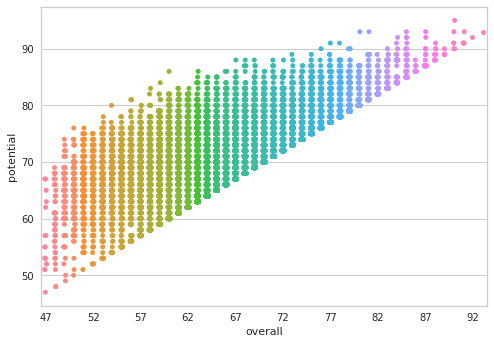

In [ ]:
plot1 = sns.stripplot(full_data.overall, full_data.potential)
plot1.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


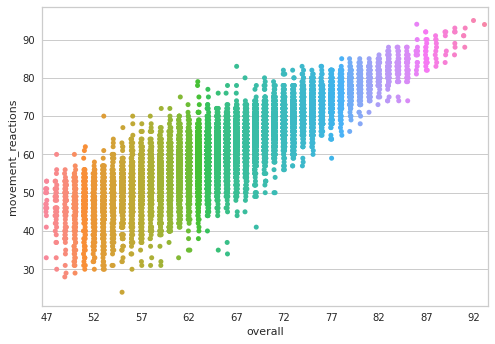

In [ ]:
plot2 = sns.stripplot(full_data.overall, full_data.movement_reactions)
plot2.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

The two plots above show a correlation of some independent variables among each other. In order to account for this, we will get rid of the significant variables, as we will also perform regularization approaches such as Lasso and Ridge regression.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


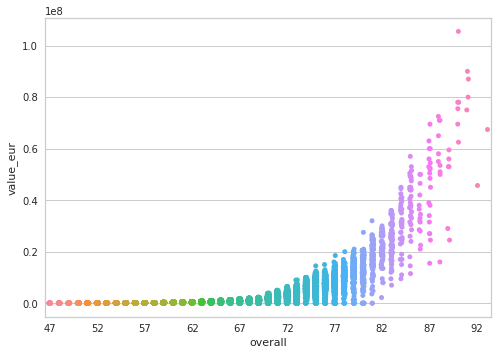

In [ ]:
plot3 = sns.stripplot(full_data.overall, full_data.value_eur)
plot3.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

The last plot nicely shows the exponential nature of the development of market values of football players. By assuming that the overall rating is a reliable base for the measurement of the overall ability of a football player, we can clearly see that the value increases exponentially with a growing overall ability.

In order to account for this, we will perform a log-transformation of the target variable value_eur, in order to achieve a linear relationship. After the models have been performed, this will be done backwards for interpretability of the final results.

In [ ]:
plot4 = plt.hist(full_data.overall, bins=15)
plt.show()

In [ ]:
full_data.overall.mean(), full_data.value_eur.mean()

(65.67778716216216, 2224813.2918074327)

As the feature overall is assumed to be the main driver for the market value of a player, a histogram is displayed before dropping the feature. The shape has a normal form which appears to be centered around a mean in the mid 60's (confirmed by the following calculation). Therefore, it can be concluded that the entirety of features contributing to this feature obtain similar distributions.

### Cleaning and Feature Engineering

As first step in the data cleaning process, the last 26 columns of the dataset are dropped. These columns are perceived to be irrelevant for this analysis, as they only contain additional information on players rating on other positions. Afterwards, each additional column which is not perceive as informative for the analysis will be deleted manually. The dataset afterwards contains 71 columns.

In [ ]:
fifa_data = full_data.iloc[: , :-26]
cols_todrop = ["release_clause_eur","team_position","league_rank","club_name", "league_name", "defending_marking", "loaned_from","player_url", "dob", "nationality", "real_face", "team_jersey_number", "nation_jersey_number", "player_tags", "nation_position","body_type", "short_name", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", "overall", "potential","wage_eur"]
fifa_data = fifa_data.drop(cols_todrop, axis = 1)

Especially, the last three columns are to be evaluated specifically. As previously introduced, "overall" ( corresponding to the overall rating of the player) is to be dropped as a strong correlation between the market value and the players overall rating has been shown and assumed. The models are to be performed on features only which correspond to pure abilities of a player. The same applies to "potential", which is based on the value of "overall", as it represents the potential space for improvement of any players "overall" rating over time. "Wage" is also gonna be dropped for the same reasons.

The dataset contains information on contract start and contract end, both features are summarized in overall contract length.

In [ ]:
#for some players, contract information is not given. therefore, we have to handle the nulls by inserting 0.
fifa_data.contract_valid_until = fifa_data.contract_valid_until.fillna(0)
contract_end = fifa_data.contract_valid_until
contract_start = fifa_data.joined

#starting date is given in date-format. we extract the year only (for simplification)
contract_start = contract_start.str.slice(0, 4)
contract_end = contract_end.fillna(0)
contract_start = contract_start.astype(float)
contract_start = contract_start.fillna(0)
contract_length = contract_end - contract_start
fifa_data["contract_length"] = contract_length

The data contains information on the players' work rate on the offensive and defensive end. Both informations are stored in dummy variables.

In [ ]:
#simply separate the column existing so far in two parts
fifa_data[['workrate_offense','workrate_defense']] = fifa_data['work_rate'].str.split('/',expand=True)
#create dictionary mapping each string value to a numeric counterpart
mapping = {'Low': 1, 'Medium': 2, "High" : 3} 
fifa_data = fifa_data.replace({'workrate_offense': mapping, 'workrate_defense': mapping})
#drop the original column
fifa_data = fifa_data.drop("work_rate",axis=1)

The same process is applied to the feature "preferred foot". Furthermore, the feature "player_positions" will be reduced to the first entry, as this represents the players' major/main position.

In [ ]:
#Create a dummy variable for the preferred foot
mapping1 = {'Left':0, 'Right':1}
fifa_data=fifa_data.replace({'preferred_foot':mapping1})

In [ ]:
fifa_data.player_positions = fifa_data.player_positions.str.split(', ',expand=True)

The players' favorite positions are being assigned to 4 head-categories GK (Goalkeepers), DEF (Defenders), MF (Midfielders) and STR (Strikers), which could be used extensive to this report. Another dummy variable is being created, which will be the base for further processing later in the code.

In [ ]:
#create position dummy considering all positions and its sub-positions
gk_pos = ["GK"]
def_pos = ["RWB", "LWB", "LB", "RB", "CB"]
mf_pos = ["CDM", "CM", "CAM", "RM", "LM", "LW", "RW"]
str_pos = ["CF", "ST"]
conditions  = [ fifa_data["player_positions"].isin(gk_pos), fifa_data["player_positions"].isin(def_pos), fifa_data["player_positions"].isin(mf_pos),fifa_data["player_positions"].isin(str_pos) ]
choices     = [ 1,2,3,4 ]
    
fifa_data["position_dummy"] = np.select(conditions, choices, default=np.nan)
fifa_data["position_dummy"] = fifa_data.position_dummy.astype(int)
fifa_data.joined = fifa_data.joined.str.split('-',expand=True)
fifa_data.contract_length = fifa_data.contract_length.astype(int)

Furthermore, the feature "number_of_traits" is being simplified to a simple number count of special traits of each player.

In [ ]:
#create list for trait column
fifa_data.player_traits = fifa_data.player_traits.str.split(', ')
fifa_data["number_of_traits"] = 0
fifa_data["number_of_traits"] = fifa_data.player_traits.str.len()

#line above assigns null to non-existens cells, fill with 0
fifa_data.number_of_traits = fifa_data.number_of_traits.fillna(0)

#convert from float to int
fifa_data.number_of_traits = fifa_data.number_of_traits.astype(int)

#drop the original column
fifa_data = fifa_data.drop(["player_traits"],axis=1)

Subsequently, further columns are being dropped which partly have been used for prior transformation.

In [ ]:
fifa_data = fifa_data.drop(["joined","contract_valid_until", "player_positions"],axis=1)

#### Treatment of Missing Values

The dataset contains a lot of columns, therefore some nulls are present which are to be removed/handled systematically. As previously indicated, players which are not goalkeepers for instance do not have values for the variables which are specific for a goalie and vice versa. This is nothing serious, just needs to be accounted for.

Furthermore, some players appear to not have a market value. As this is the target variable, those players are to be dropped as there is no reason to carry them forward.

In [ ]:
fifa_data.value_eur.value_counts(sort=False)

0           237
29000000      4
3900000      80
230000      156
58000000      1
           ... 
56000000      2
13500000     24
950000      153
475000      386
42500000      1
Name: value_eur, Length: 214, dtype: int64

In [ ]:
fifa_data[fifa_data.columns[fifa_data.isnull().any()]].isnull().sum()

pace               2083
shooting           2083
passing            2083
dribbling          2083
defending          2083
physic             2083
gk_diving         16861
gk_handling       16861
gk_kicking        16861
gk_reflexes       16861
gk_speed          16861
gk_positioning    16861
dtype: int64

In [ ]:
fifa_data = fifa_data.loc[fifa_data['value_eur'] != 0]
col_fill = ["pace", "shooting", "passing", "dribbling", "defending", "physic", "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning"]
fifa_data[col_fill] = fifa_data[col_fill].fillna(0)

In [ ]:
fifa_data[fifa_data.columns[fifa_data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Now, every null value was get rid of.

#### Log transformation of the target variable

Due to various conceptual and statistical/mathematical reasons (as previously introduced), a log transformation of the target variable is performed.

In [ ]:
fifa_data.value_eur = np.log(fifa_data.value_eur)

Methods to treat null values: drop, mean or fill with zero

a) dropping not desired

b) mean might not be applicable

c) best solution

One goalkeeper has weird values (correspond to field players, this has been an issue which is known ). Due to the following split, he is dropped.

In [ ]:
reg_data = fifa_data
reg_data = reg_data[reg_data.long_name != "Marlon Rômulo Barni Barros"]

## Split GK / Field

In [ ]:
#create goalkeeper dataframe by selecting players with corresponding position index
gk_df = reg_data[reg_data.position_dummy == 1]
gk_df = gk_df[["long_name","age", "height_cm", "weight_kg", "value_eur", "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_vision", "mentality_penalties", "mentality_composure", "number_of_traits"]]

#for later processing, create dictionaries containing players name/age and respective index in base dataframe
name_gk = list(gk_df.long_name)
index_gk = list(gk_df.index)
gk_zip_iter = zip(index_gk, name_gk)
gk_dict = dict(gk_zip_iter)

age_gk = list(gk_df.age)
gk_age_zip_iter = zip(index_gk, age_gk)
gk_age_dict = dict(gk_age_zip_iter)
gk_df= gk_df.drop(["long_name"], axis=1)

For both datasets, only those columns are carried forward, which are representative for the position. E.g., field players sometimes have default values for the goalkeeper-variables (gk_diving, gk_handling...), but those are very low, misleading and will influence the model. Vice versa the same.

In [ ]:
#repeat process for fieldplayers
field_df = reg_data[reg_data.position_dummy != 1]
field_df = field_df.drop(["sofifa_id", "gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", "international_reputation", "position_dummy", "preferred_foot"],axis=1)

name_field = list(field_df.long_name)
index_field = list(field_df.index)
field_zip_iter = zip(index_field, name_field)
field_dict = dict(field_zip_iter)

age_field = list(field_df.age)
field_age_zip_iter = zip(index_field, age_field)
field_age_dict = dict(field_age_zip_iter)
field_df = field_df.drop(["long_name"],axis = 1)
gk_df = gk_df.astype(float)
field_df = field_df.astype(float)

### EDA 2

As the dataframes now does have the desired shape, a second exploratory data analysis is executed.

In [ ]:
len(gk_df), len(field_df)

(2053, 16653)

In [ ]:
gk_df.info(), field_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 2 to 18926
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    2053 non-null   float64
 1   height_cm              2053 non-null   float64
 2   weight_kg              2053 non-null   float64
 3   value_eur              2053 non-null   float64
 4   gk_diving              2053 non-null   float64
 5   gk_handling            2053 non-null   float64
 6   gk_kicking             2053 non-null   float64
 7   gk_reflexes            2053 non-null   float64
 8   gk_speed               2053 non-null   float64
 9   gk_positioning         2053 non-null   float64
 10  movement_acceleration  2053 non-null   float64
 11  movement_sprint_speed  2053 non-null   float64
 12  movement_agility       2053 non-null   float64
 13  movement_reactions     2053 non-null   float64
 14  movement_balance       2053 non-null   float64
 15  pow

(None, None)

The datasets used for running machine learning algorithms now contain 2053 goalkeepers (23 features), and 16653 fieldplayers, defenders, midfielders and strikers, characterized by 43 features.

In [ ]:
gk_df.mean()

age                       26.193863
height_cm                188.312226
weight_kg                 81.625426
value_eur                 13.019848
gk_diving                 65.115928
gk_handling               62.831466
gk_kicking                61.674623
gk_reflexes               66.067219
gk_speed                  37.156357
gk_positioning            63.107160
movement_acceleration     37.004384
movement_sprint_speed     37.276668
movement_agility          39.395032
movement_reactions        58.469070
movement_balance          42.305894
power_shot_power          46.390161
power_jumping             57.167560
power_stamina             29.830979
power_strength            59.912811
power_long_shots          11.736970
mentality_vision          38.710667
mentality_penalties       18.956162
mentality_composure       41.725767
number_of_traits           0.520701
dtype: float64

FIFA uses a value range from 1 to 99 for all features that correspond to player abilities. This can be nicely sean by the mean of the goalkeeper dataset for instance (exceptions are age, height_cm, weight_kg, value_eur and number_of_traits). The rest of the variables are centered around 40-60, besides one feature corresponding to the mental composure.

In [ ]:
field_df.mean()

age                            25.040053
height_cm                     180.313997
weight_kg                      74.190656
value_eur                      13.611956
weak_foot                       2.989611
skill_moves                     2.530655
pace                           67.681319
shooting                       52.236954
passing                        57.092356
dribbling                      62.433736
defending                      51.267219
physic                         64.428091
attacking_crossing             53.969915
attacking_finishing            50.037651
attacking_heading_accuracy     56.517444
attacking_short_passing        62.587942
attacking_volleys              46.478112
skill_dribbling                60.736144
skill_curve                    51.196061
skill_fk_accuracy              45.792410
skill_long_passing             55.886807
skill_ball_control             63.274425
movement_acceleration          67.662884
movement_sprint_speed          67.677235
movement_agility

The fieldplayer data is characterized similarly.

Finally, the dataset is to be examined for outliers. The Interquartile-Range is used for this exploration. However, the majority of variables can be neglected, as it is known that the values can only be within a range from 1 to 99. 

In [ ]:
Q1_gk_age = gk_df.age.quantile(0.25)
Q3_gk_age = gk_df.age.quantile(0.75)
mask_gk_age = gk_df.age.between(Q1_gk_age, Q3_gk_age, inclusive=True)

Q1_field_age = field_df.age.quantile(0.25)
Q3_field_age = field_df.age.quantile(0.75)
mask_field_age = field_df.age.between(Q1_field_age, Q3_field_age, inclusive=True)

Q1_gk_weight_kg = gk_df.weight_kg.quantile(0.25)
Q3_gk_weight_kg = gk_df.weight_kg.quantile(0.75)
mask_gk_weight_kg = gk_df.weight_kg.between(Q1_gk_weight_kg, Q3_gk_weight_kg, inclusive=True)

Q1_field_weight_kg = field_df.weight_kg.quantile(0.25)
Q3_field_weight_kg = field_df.weight_kg.quantile(0.75)
mask_field_weight_kg = field_df.weight_kg.between(Q1_field_weight_kg, Q3_field_weight_kg, inclusive=True)

In [ ]:
Q1_gk_age, Q1_field_age, Q1_gk_weight_kg, Q1_field_weight_kg

(22.0, 21.0, 78.0, 70.0)

In [ ]:
Q3_gk_age, Q3_field_age, Q3_gk_weight_kg, Q3_field_weight_kg

(30.0, 28.0, 85.0, 79.0)

In [ ]:
mask_gk_age.value_counts(), mask_field_age.value_counts(), mask_gk_weight_kg.value_counts(), mask_field_weight_kg.value_counts()

(True     1103
 False     950
 Name: age, dtype: int64,
 True     9649
 False    7004
 Name: age, dtype: int64,
 True     1051
 False    1002
 Name: weight_kg, dtype: int64,
 True     9195
 False    7458
 Name: weight_kg, dtype: int64)

Following the previous analysis, the players age and weight is within the IQR for around 50-60% of the four scenarios. However, player outside this range should not be perceived as outliers biasing the data, and are therefore carried forward.

<AxesSubplot:>

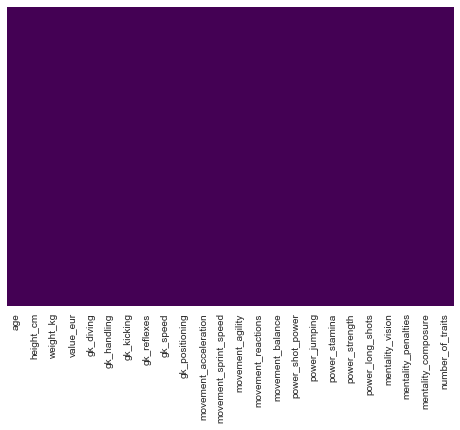

In [ ]:
sns.heatmap(gk_df.isnull(),cbar=False,yticklabels=False,cmap="viridis")

<AxesSubplot:>

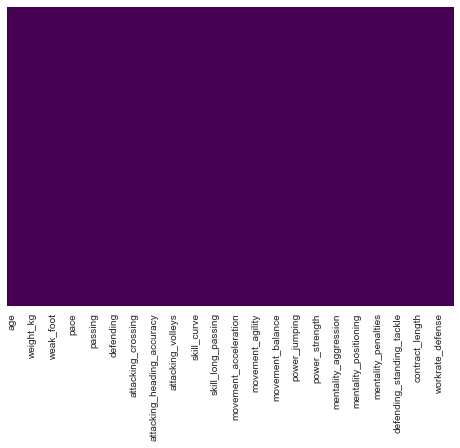

In [ ]:
sns.heatmap(field_df.isnull(),cbar=False,yticklabels=False,cmap="viridis")

Both heatmaps confirm again the presence of no null-values, as those would be characterized by a different color in the heatmap.

<AxesSubplot:>

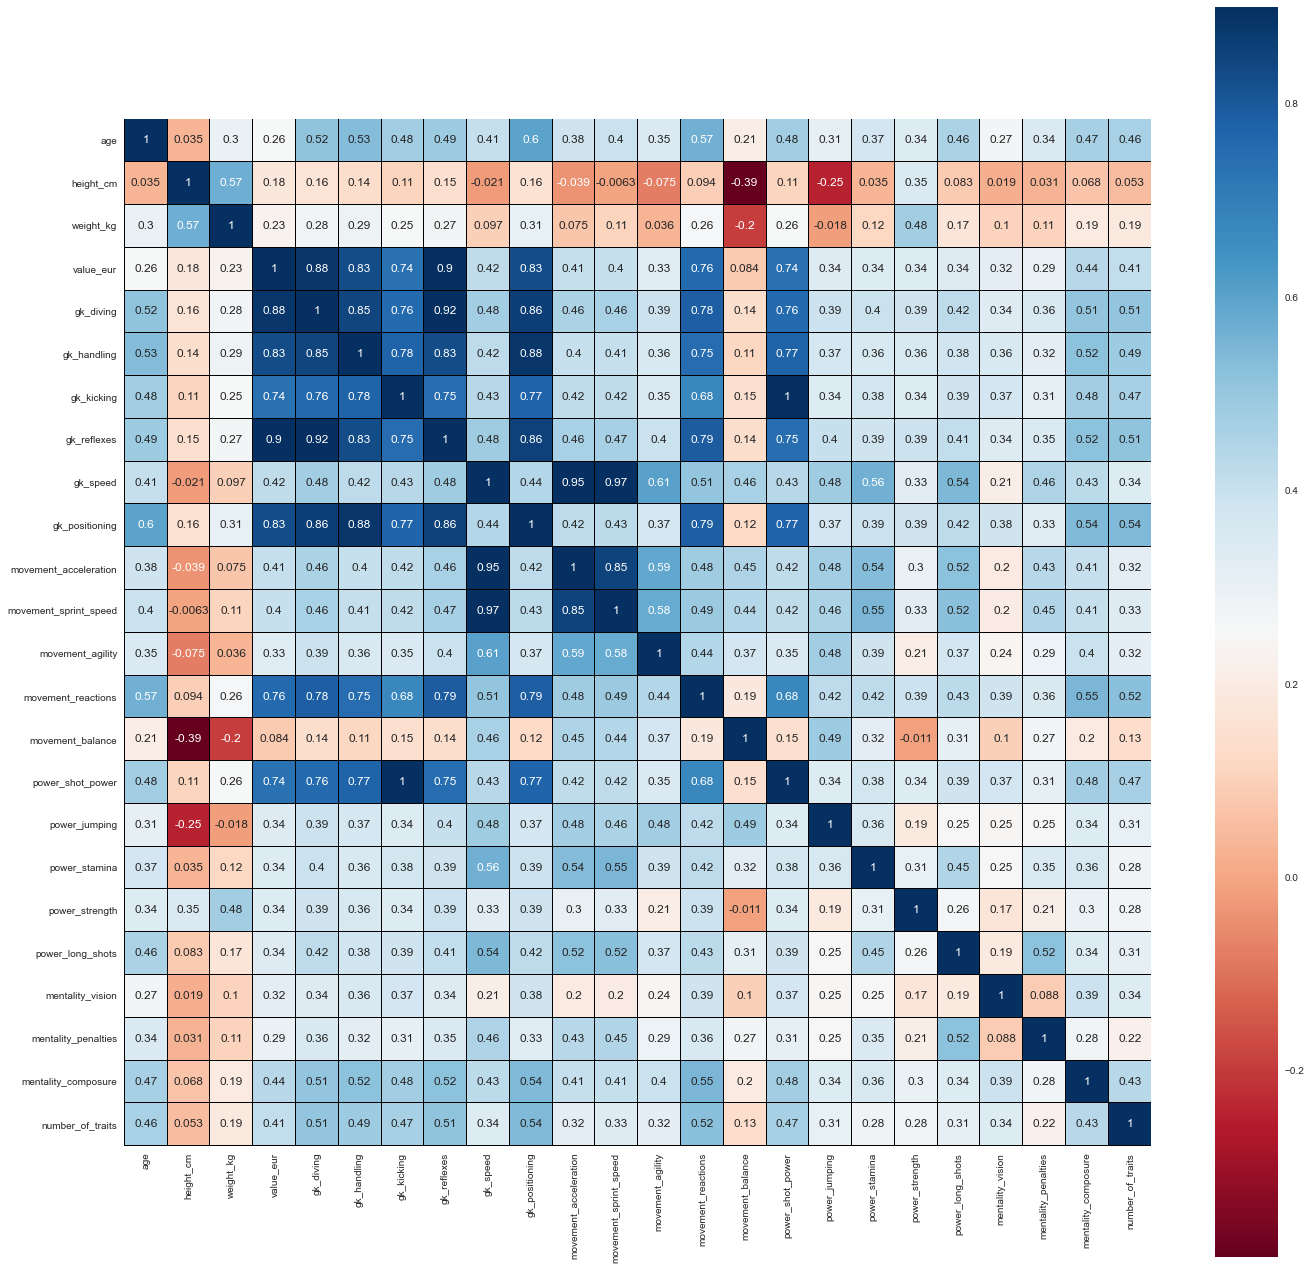

In [ ]:
corr_gk = gk_df.corr(method="spearman")
plt.figure(figsize=(23,23))
sns.heatmap(corr_gk,vmax=.9,linewidths=0.01,square=True,annot=True,cmap="RdBu",linecolor="black")

<AxesSubplot:>

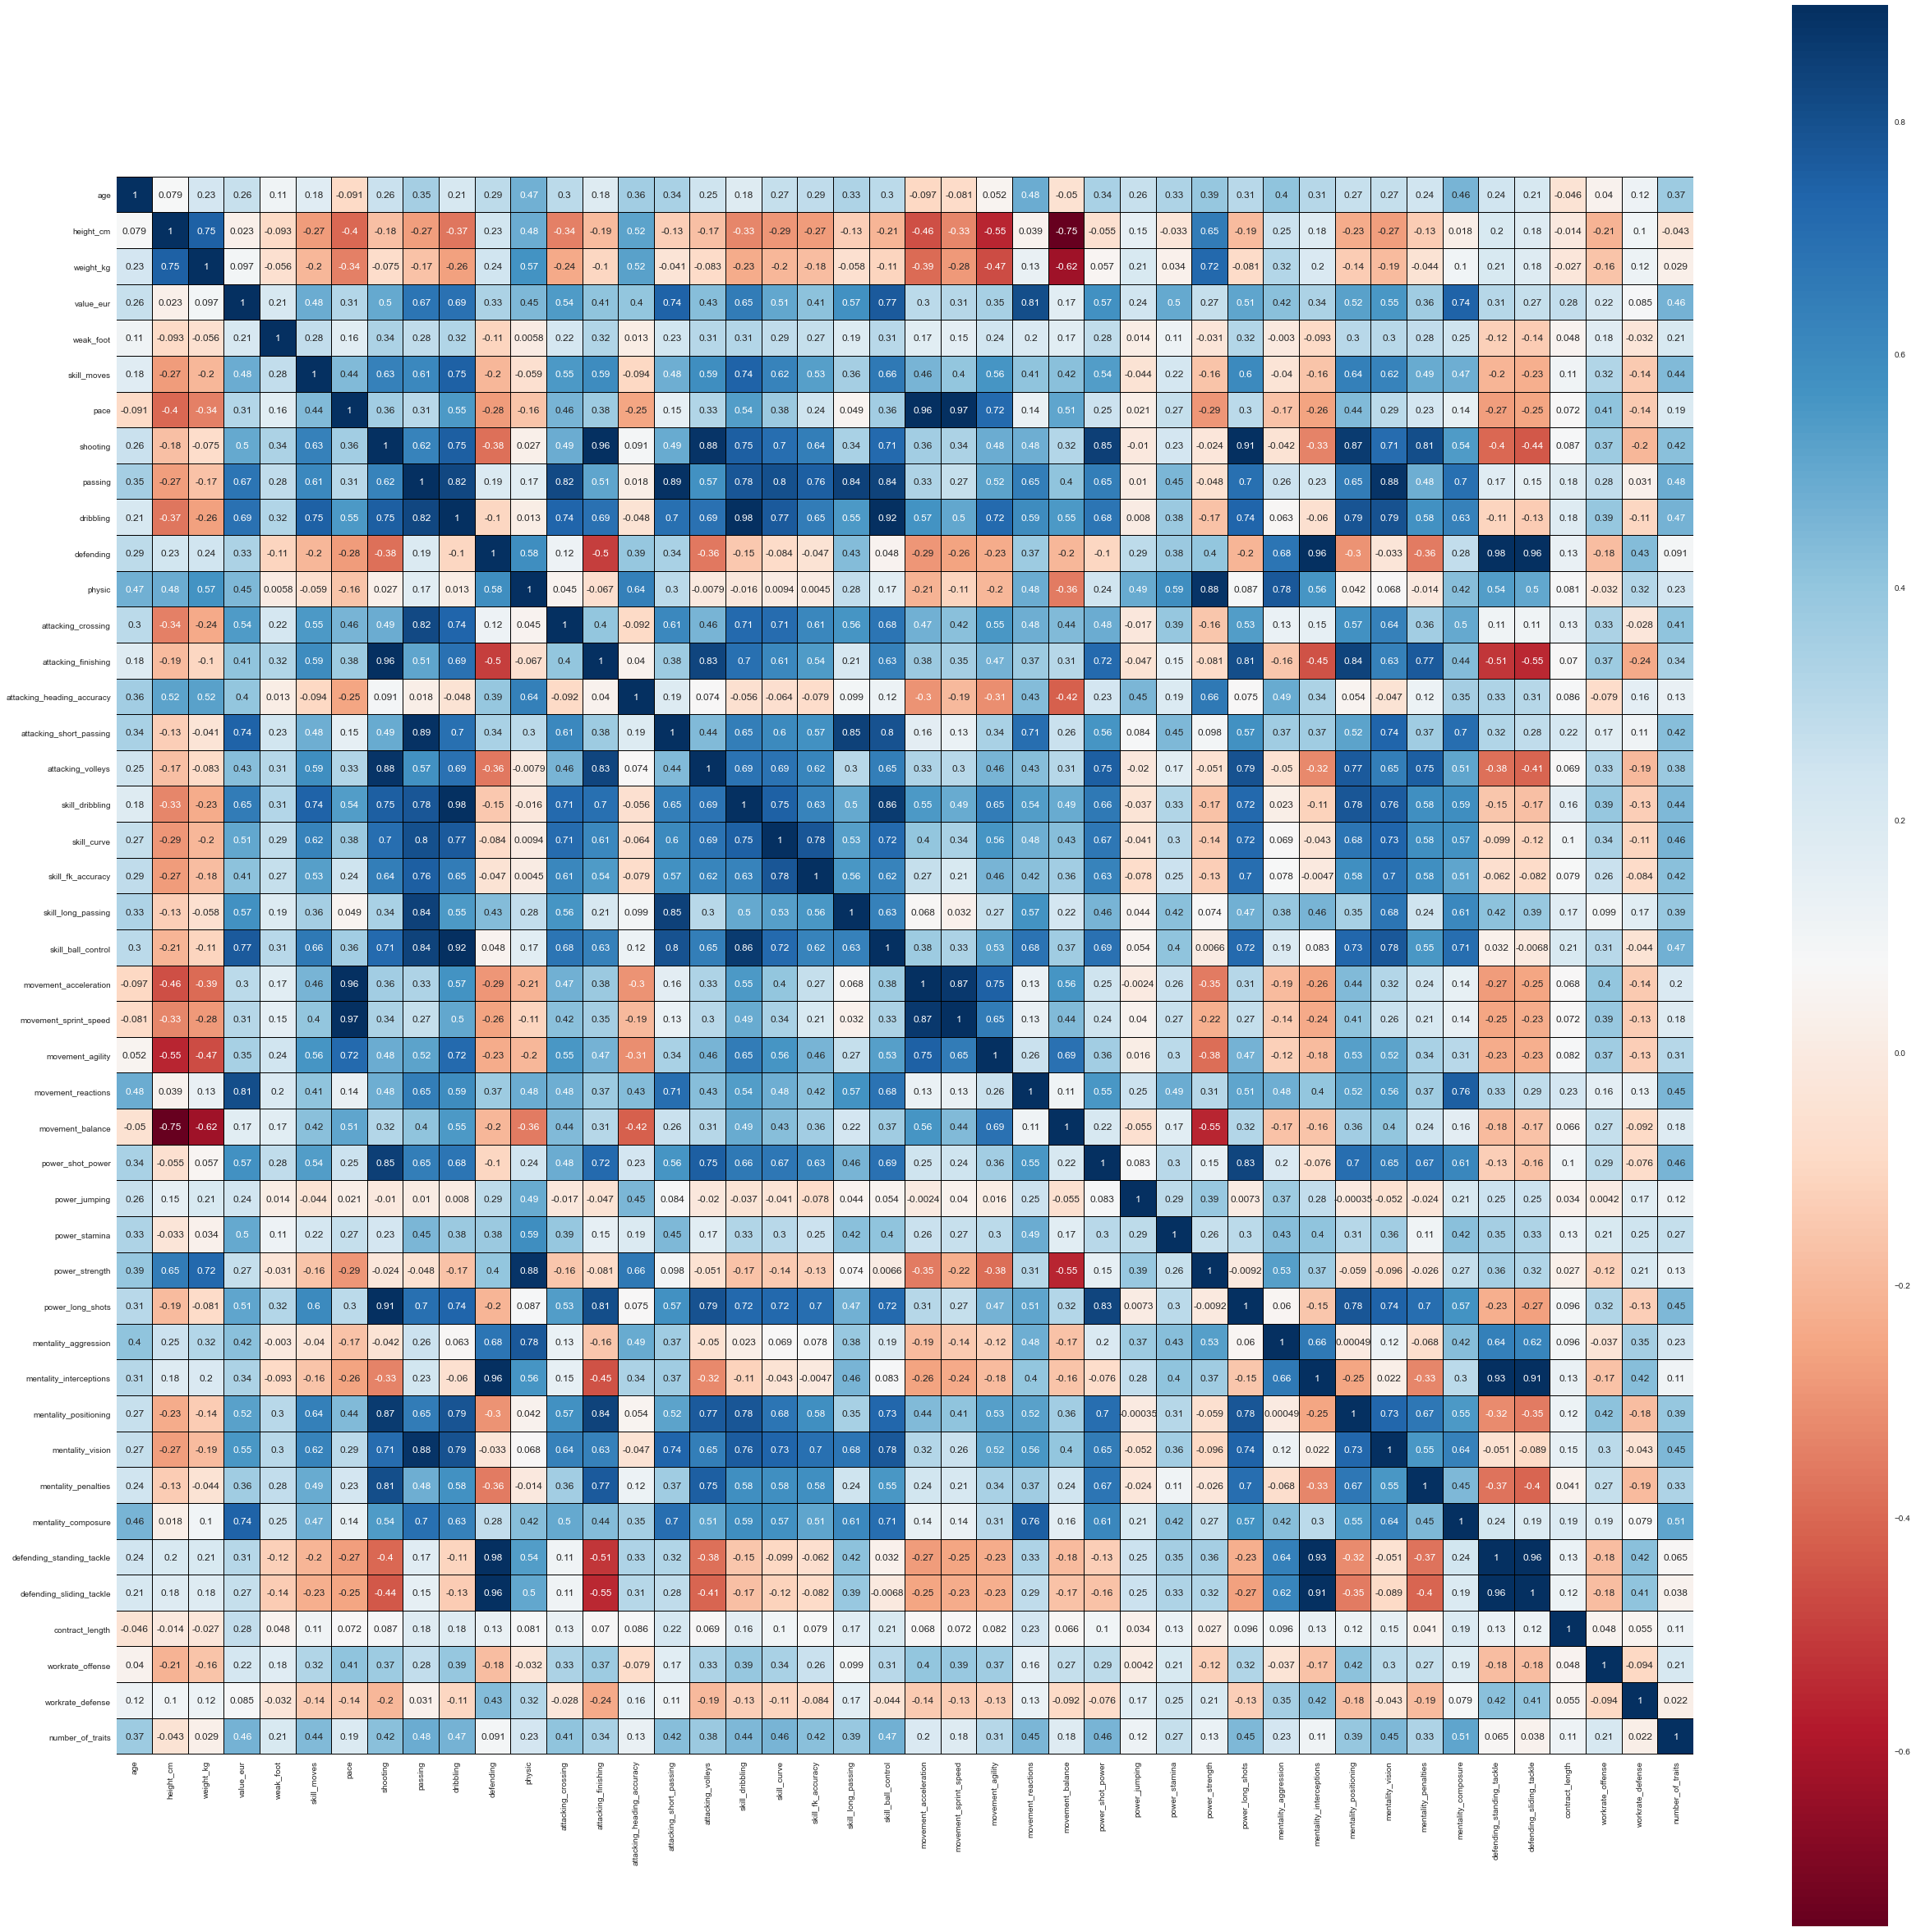

In [ ]:
corr_field = field_df.corr(method="spearman")
plt.figure(figsize=(43,43))
sns.heatmap(corr_field,vmax=.9,linewidths=0.01,square=True,annot=True,cmap="RdBu",linecolor="black")

In [ ]:
#gk_df, field_df

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d0001f84-164c-454a-9f8a-a2e6174a5f5c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>